In [456]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')


In [457]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [458]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [459]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [460]:
categorical = [var for var in data.columns if data[var].dtype == "O"]
'number of categorical variables: {}'.format(len(categorical))


Kategorik Değişken sayısı: 0


In [495]:
numerical = [var for var in data.columns if data[var].dtype != 'O']

print('number of numeric variables: {}\n'.format(len(numerical)))

'Numeric columns :', numerical

number of numeric variables: 12



('Numeric columns :',
 ['fixed_acidity',
  'volatile_acidity',
  'citric_acid',
  'residual_sugar',
  'chlorides',
  'free_sulfur_dioxide',
  'total_sulfur_dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [463]:

data.columns = data.columns.str.replace(" ", "_")

# Yeni sütun adları listesi
new_cols = data.columns.tolist()

Let's see what substances affect the quality

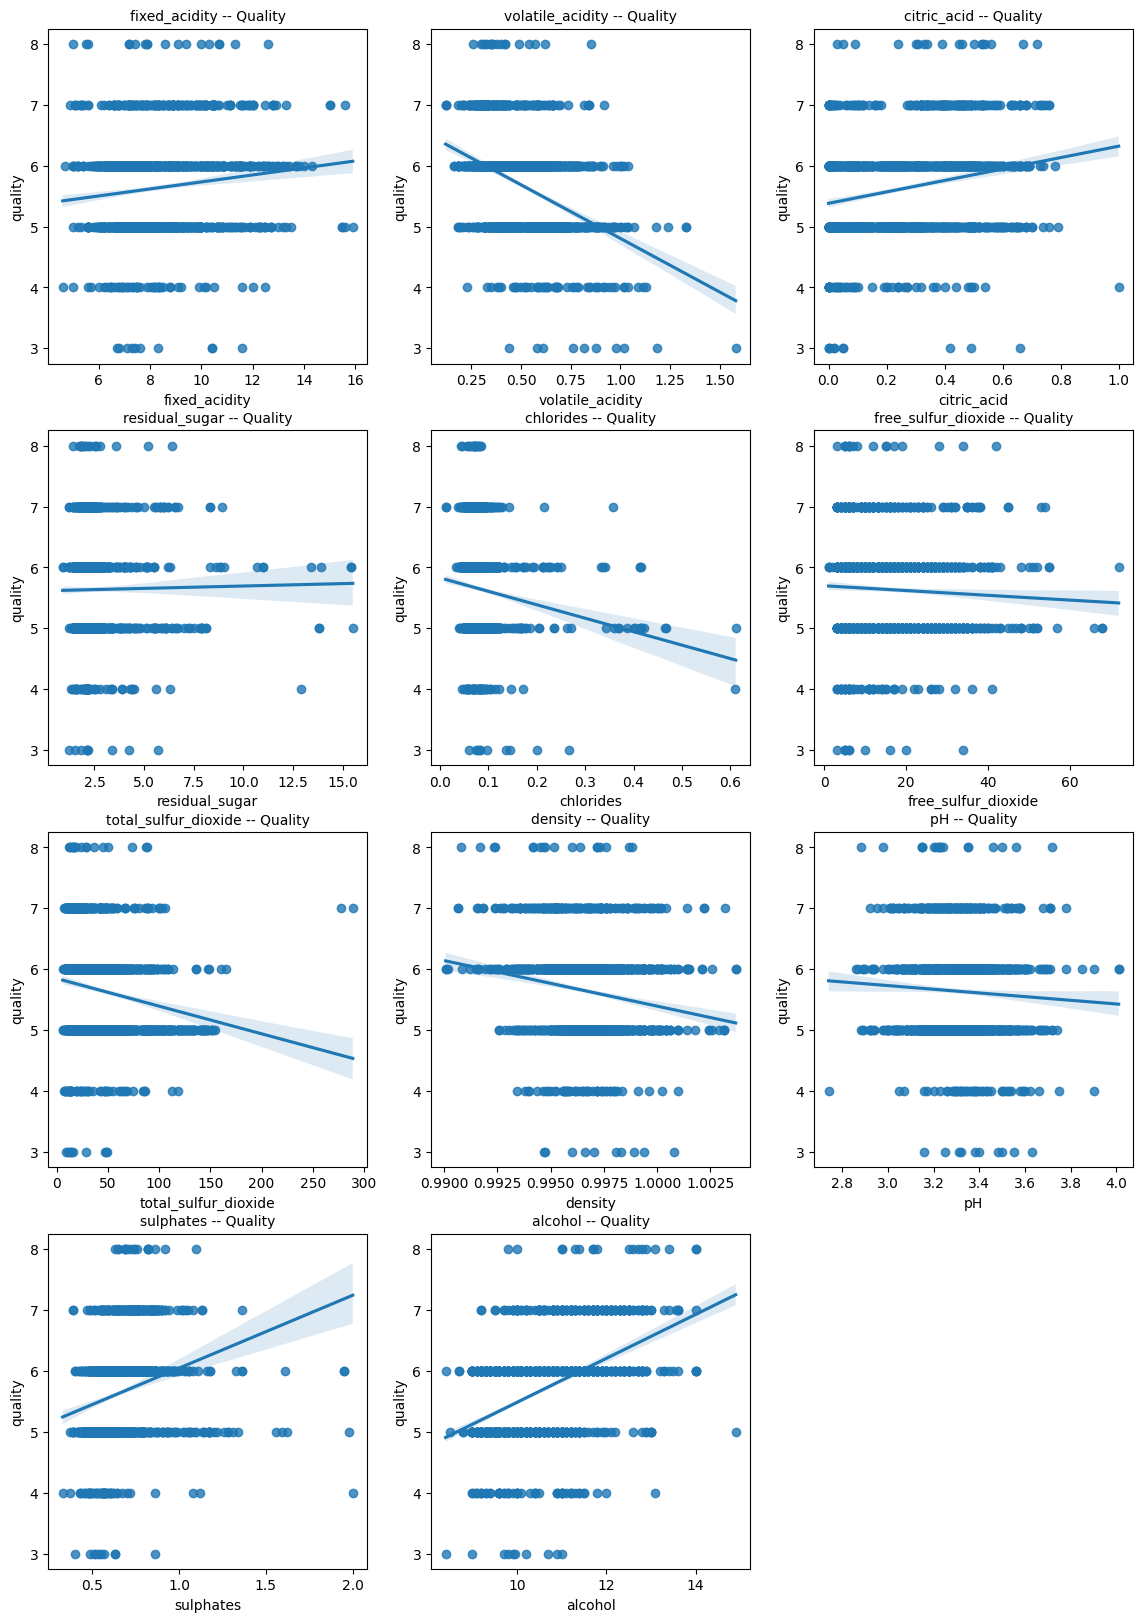

In [464]:
plt.figure(figsize=(14,20))

for i in range(len(new_cols)-1):
    plt.subplot(4,3,i+1)
    plt.title(new_cols[i] + " -- Quality", fontsize=10)
    sns.regplot(x=eval('data' + '.' + new_cols[i]), y=data.quality)

plt.show()

In [465]:

X = data.drop("quality",axis=1) 
y = data["quality"]


In [466]:
from sklearn.preprocessing import MinMaxScaler

In [467]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_X, columns= data.columns.drop("quality"))
scaled_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [468]:
X = scaled_df[["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol"]]
type(X)


pandas.core.frame.DataFrame

In [469]:
from sklearn.model_selection import train_test_split

In [470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [471]:
from sklearn.linear_model import LinearRegression

In [472]:
lr = LinearRegression()

In [473]:
lr.fit(X_train, y_train)

LinearRegression()

In [474]:
print('slope (coeffificent):', lr.coef_)

slope (coeffificent): [ 0.49515412 -1.587507   -0.20146359  0.65462576 -1.08761621  0.13232996
 -0.9077994  -0.57651655 -0.48876995  1.54068097  1.75568988]


In [475]:
from sklearn.feature_selection import RFE

rfe = RFE(lr)
rfe = RFE(lr,n_features_to_select=10)

rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [476]:
rfe.support_

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [477]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed_acidity', True, 1),
 ('volatile_acidity', True, 1),
 ('citric_acid', True, 1),
 ('residual_sugar', True, 1),
 ('chlorides', True, 1),
 ('free_sulfur_dioxide', False, 2),
 ('total_sulfur_dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [478]:
X_train.columns[rfe.support_]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

In [479]:
import statsmodels.api as sm



In [480]:
X_train_ols = sm.add_constant(X_train)


In [481]:
X_train_ols

,const,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
858,1.0,0.628319,0.109589,0.47,0.054795,0.070117,0.225352,0.091873,0.498532,0.322835,0.203593,0.338462
654,1.0,0.353982,0.239726,0.47,0.102740,0.103506,0.084507,0.081272,0.574890,0.267717,0.077844,0.169231
721,1.0,0.380531,0.246575,0.24,0.133562,0.136895,0.478873,0.353357,0.596916,0.283465,0.119760,0.123077
176,1.0,0.238938,0.178082,0.21,0.075342,0.113523,0.084507,0.102473,0.442731,0.464567,0.083832,0.169231
692,1.0,0.353982,0.253425,0.51,0.075342,0.684474,0.211268,0.197880,0.574890,0.228346,0.502994,0.092308
...,...,...,...,...,...,...,...,...,...,...,...,...
53,1.0,0.353982,0.178082,0.36,0.143836,0.115192,0.408451,0.399293,0.508811,0.362205,0.137725,0.153846
350,1.0,0.539823,0.376712,0.22,0.123288,0.158598,0.225352,0.098940,0.758443,0.425197,0.389222,0.230769
79,1.0,0.327434,0.345890,0.20,0.041096,0.113523,0.366197,0.399293,0.523495,0.330709,0.473054,0.107692
792,1.0,0.221239,0.335616,0.02,0.109589,0.115192,0.225352,0.286219,0.541850,0.582677,0.161677,0.200000


In [482]:
#sm.add_constant
sm_model = sm.OLS(y_train, X_train_ols)
sonuc = sm_model.fit()
print(sonuc.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     61.42
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          1.68e-106
Time:                        13:44:37   Log-Likelihood:                -1086.5
No. Observations:                1119   AIC:                             2197.
Df Residuals:                    1107   BIC:                             2257.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.8135 

If value of coef is negative, This means that this substance in the product affects the quality negatively.
and if the p value is greater than 0.05, its effect does not change the result much. we will delete them


In [483]:

X_train_ols = X_train_ols.drop(["pH"],axis = 1)
X_train_ols = X_train_ols.drop(["density"],axis = 1)
X_train_ols = X_train_ols.drop(["citric_acid"],axis = 1)
X_train_ols = X_train_ols.drop(["fixed_acidity"],axis = 1)
X_train_ols = X_train_ols.drop(["free_sulfur_dioxide"],axis = 1)


We have defined a simple function that lets us do ols

In [484]:
def train_ols(X,y):
    X = sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())

In [485]:
train_ols(X_train_ols, y_train)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     108.2
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          2.04e-107
Time:                        13:44:37   Log-Likelihood:                -1095.8
No. Observations:                1119   AIC:                             2206.
Df Residuals:                    1112   BIC:                             2241.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.4513 

In [486]:
X_train_ols = X_train_ols.drop(["residual_sugar"],axis = 1)
train_ols(X_train_ols, y_train)

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          2.84e-107
Time:                        13:44:37   Log-Likelihood:                -1098.7
No. Observations:                1119   AIC:                             2209.
Df Residuals:                    1113   BIC:                             2239.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.4870 

The ratio of sulphates and alcohol was the most affecting the quality of the wine.
volatile acidity, which adversely affects
